<a href="https://colab.research.google.com/github/ggurusaran/test1/blob/main/mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale = 1/.255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip= True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 7559 images belonging to 2 classes.


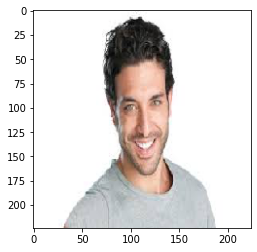

In [3]:
img_path = '/content/drive/MyDrive/data/without_mask/without_mask_1000.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

In [4]:
test_datagen = ImageDataGenerator(rescale = 1/.255,)
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Masks Dataset/Test',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 100 images belonging to 2 classes.


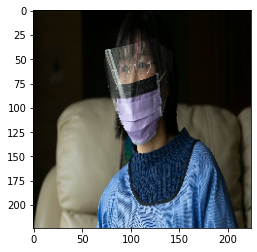

In [5]:
#test image
img_path = '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0042.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
 cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size=3, activation ='relu', input_shape = [64,64,3]))

In [8]:
 cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters= 32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
cnn.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [15]:
History = cnn.fit(x = training_set, validation_data = test_set, epochs=100)

Epoch 1/100
 63/237 [======>.......................] - ETA: 29:59 - loss: 4.6350 - accuracy: 0.7223

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


237/237 [==============================] - 2472s 10s/step - loss: 1.8439 - accuracy: 0.7752 - val_loss: 0.6217 - val_accuracy: 0.7900
Epoch 2/100
237/237 [==============================] - 36s 151ms/step - loss: 0.4213 - accuracy: 0.8483 - val_loss: 0.4784 - val_accuracy: 0.8200
Epoch 3/100
237/237 [==============================] - 36s 150ms/step - loss: 0.3111 - accuracy: 0.8825 - val_loss: 0.3097 - val_accuracy: 0.8700
Epoch 4/100
237/237 [==============================] - 37s 155ms/step - loss: 0.2646 - accuracy: 0.8948 - val_loss: 0.4346 - val_accuracy: 0.8400
Epoch 5/100
237/237 [==============================] - 37s 155ms/step - loss: 0.2271 - accuracy: 0.9083 - val_loss: 0.4568 - val_accuracy: 0.8300
Epoch 6/100
237/237 [==============================] - 35s 150ms/step - loss: 0.2193 - accuracy: 0.9152 - val_loss: 0.2984 - val_accuracy: 0.8700
Epoch 7/100
237/237 [==============================] - 35s 149ms/step - loss: 0.2158 - accuracy: 0.9186 - val_loss: 0.2899 - val_accurac

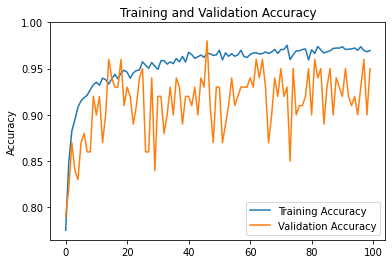

In [16]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
y_pred = cnn.predict(test_set)
y_pred = y_pred>0.5
print(y_pred)

4/4 [==============================] - 2s 405ms/step
[[False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]]


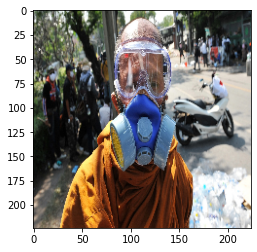

1/1 [==============================] - 0s 17ms/step
wear mask please


In [19]:
import numpy as np
from keras.preprocessing import image

img_path = '/content/drive/MyDrive/New Masks Dataset/Train/Mask/0019.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

test_image = tf.keras.utils.load_img(img_path, target_size = (64, 64))
#convert image format into array

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'yes, mask is there'
else:
  prediction = 'wear mask please'

print(prediction)